# Dominik Szot
Laboratorium 09 <br>
Równania różniczkowe zwyczajne

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as scp
import scipy.integrate as integrate
import matplotlib.ticker
import sympy
from scipy.optimize import fsolve
import collections
import itertools

<b>Zadanie 1</b> <br>
Przedstaw każde z poniższych równań różniczkowych zwyczajnych
jako równoważny układ równań pierwszego rzędu (ang. first-order system of
ODEs):

* <b>równanie Van der Pol'a: </b> <br>
$ y'' = y'(1-y^2) - y $ <br>

$$
\left\{
\begin{matrix}
y_{1} = y' 
\\
y_{1}' = y_{1}(1-y^2) - y
\end{matrix}\right.
$$

* <b>równanie Blasiusa: </b> <br>
$ y''' = -yy'' $ <br>

$$
\left\{\begin{matrix}
 y_1 = y \\
 y_2 = y_1' \\
 y_3' = -y_1y_2'
\end{matrix}\right.
$$

* <b>II zasada dynamiki Newtona dla problemu dwóch ciał:</b> <br>
$ y_1'' = -GM_{y1}/(y_{1}^2 + y_{2}^2)^{3/2} $ <br>
$ y_2'' = -GM_{y2}/(y_{1}^2 + y_{2}^2)^{3/2} $ <br>

$$
\left\{\begin{matrix}
 y_3 = y_1' \\
 y_4 = y_2' \\
 y_3' = -GMy_1/(y_1^2 + y_2^2)^{3/2} \\
 y_4' = -GMy_2/(y_1^2 + y_2^2)^{3/2}
\end{matrix}\right.
$$

<b>Zadanie 2.</b> Dane jest równanie różniczkowe zwyczajne 
$ y_1 = -5y $
z warunkiem początkowym $ y(0) = 1 $. Równanie rozwiązujemy numerycznie z
krokiem $ h = 0.5 $

* <b> Czy rozwiązania powyższego równania są stabilne? </b> <br>
<b> Stabilność w sensie Lapundowa </b> <br>

&emsp;&emsp; Rozwiązanie $ y(t) $ jest stabilne w sensie Lapunowa, jeśli dla dowolnego  $ \epsilon > 0 $ istnieje $ \delta > 0 $, że każde <br>
&emsp;&emsp; rozwiązanie $ x(t) $ tego równania, gdy warunki początkowe spełniają nierówność

$$ || x(t_0) - y(t_0) ||  < \delta $$
&emsp;&emsp; to 
$$ ||x(t) - y(t)|| < \epsilon , t \ge t_0 $$

&emsp;&emsp;<br><br>&emsp;&emsp; Równanie o zmiennych rozdzielonych, którego rozwiązaniem jest 
$$ y(t)=e^{-5t} $$


&emsp;&emsp;Dla dowolnego $ \epsilon > 0 $ szukamy $ \delta > 0 $, że prawdziwa będzie implikacja 
$$ | 1 - 0 | < \delta => |e^{-5t} - 0| < \epsilon $$

$$ 1 < \delta => |e^{-5t} - 0| < \epsilon $$
&emsp;&emsp;Ponieważ, <br>
$$ 1 \ge e^{-5t} , t \ge 0$$ 
&emsp;&emsp;więc dla $ \epsilon = \delta $ implikacja jest prawdziwa => rozwiązanie jest stabilne w sensie Lapundowa.


* <b> Czy metoda Euler'a jest stabilna dla tego równania z użytym krokiem h? </b><br>
$$ 
Algorytm:\\
u^{n+1} = u^n - f(u^n,t^n)\cdot \Delta t \\$$ 

&emsp;&emsp;Rejon bezwzględnej stabilności: 

$$ 
|{1 - \Delta t \cdot \lambda } | \le 1
$$

$$ 
|1 - 0.5 \cdot (-5)| \nless 1
$$

&emsp;&emsp;Warunek nie jest spełniony, więc metoda nie jest stabilna dla tego równania z użytym krokiem h



* <b> Oblicz numerycznie wartości przybliżonego rozwiązania dla t = 0.5 metodą
Euler’a.</b><br>


In [35]:
f_01 = lambda y, t : -5*y
f_01_actual = lambda t : np.e**(-5*t)

def euler_method(y_0, x_0, h, t, f):
    y = y_0
    for _ in range(int(t//h)):
        y = y + h * f(y, t)

    return y

print(f"Numeryczna wartość obliczona metodą Euler'a: {euler_method(1,0, 0.5, 0.5, f_01)}")
print(f"Wartość prawidłowa: {f_01_actual(0.5)}")


Numeryczna wartość obliczona metodą Euler'a: -1.5
Wartość prawidłowa: 0.0820849986238988


* <b> Wyjaśnij, czy niejawna metoda Euler’a jest stabilna dla tego równania z
użytym krokiem h?
</b><br>


$$ 
Algorytm:\\
u^{n} = u^{n-1} + f(u^n,t^n) \cdot {\Delta t}   $$ 

&emsp;&emsp;Rejon bezwzględnej stabilności: 

$$ 
| \frac {1} {1 - \Delta t \cdot \lambda } | \le 1
$$


$$ 
| \frac {1} {1 - 0.5 \cdot (-5)}| < 1
$$

&emsp;&emsp;Warunek jest spełniony, więc wyniki pozostaną skończone dla $ n \mapsto \infty  $

In [36]:
f_01 = lambda y, t : -5*y
f_01_actual = lambda t : np.e**(-5*t)

def euler_method_implicit(y_0, x_0, h, t, f):
    y = y_0
    for _ in range(int(t//h)):
        y = y/(1 - f(y, t)*h)

    return y

print(f"Numeryczna wartość obliczona metodą Euler'a: {euler_method_implicit(1, 0, 0.5, 0.5, f_01)}")
print(f"Wartość prawidłowa: {f_01_actual(0.5)}")


Numeryczna wartość obliczona metodą Euler'a: 0.2857142857142857
Wartość prawidłowa: 0.0820849986238988


<b>Zadanie 3.</b> Rozwiąż układ równań  <br>
$$ x'' = - GMx/r^3  $$ 
$$ y'' = - GMy/r^3  $$
dla $ GM = 1 $, $ r = (x^2 + y^2)^{1/2} $

* <b> używająć jawnej metody Eulera </b><br>
$$ y_{k+1} = y_k + h_kf'(t_k, y_k) $$


In [31]:
# Simulation settings 

r_0 = [1, 0] # Position vector
v_0 = [0, 1] # Velocity vector

simulation_time = (0,5*np.pi)

initial_values = [r_0[0], r_0[1], v_0[0], v_0[1]]

simulation = {
    1: [initial_values, 0.1],
    2: [initial_values, 0.01],
    3: [initial_values, 0.001],
    4: [initial_values, 0.0001],
}

labels = {
    "x_position" : "x(t)", 
    "y_position" : "y(t)", 
    "x_velocity" : "v_x",
    "y_velocity" : "x_y", 
    "radius"     : "promień",
    "velocity"   : "prędkość",
    "energy"     : "E(x)", 
    "momentum"   : "L(x)",
    "time"       : "Time"
}

*Opis metody jewnej Eulera!*

In [54]:
def plotter(plt, result_array, x_axis, y_axis, plot_configuration):
    act = 0
    for i in list(itertools.product([0, 1], repeat=2)):
        plt[i[0], i[1]].scatter(result_array[act][x_axis],result_array[act][y_axis], label = "dt " + str(simulation[act+1][1]), s=1)
        plt[i[0], i[1]].set_title(f"Zależność {labels[x_axis]} od {labels[y_axis]}", fontdict=plot_configuration)
        plt[i[0], i[1]].set_xlabel(f"{labels[x_axis]}", fontdict=plot_configuration)
        plt[i[0], i[1]].set_ylabel(f"{labels[y_axis]}", fontdict=plot_configuration)
        plt[i[0], i[1]].legend(loc='upper left')
        act += 1

KeyError: 'time'

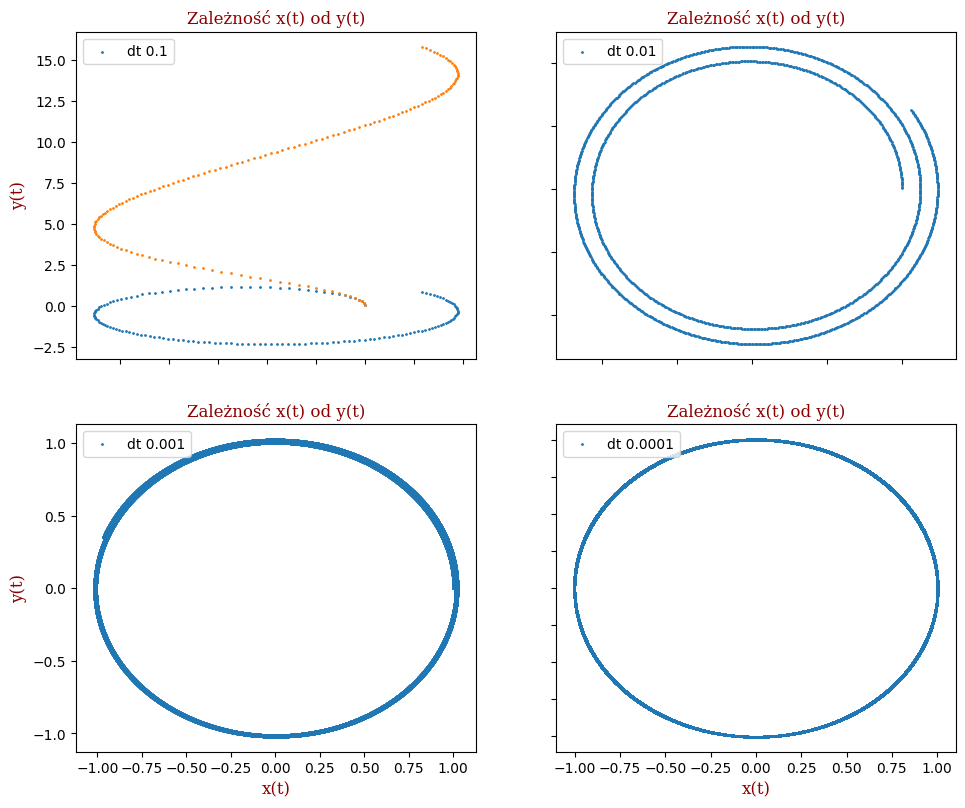

In [60]:
# Forward Euler Method
def euler_method(initial_values, dt, steps):

    t0, t1 = steps
    uvals = []
    tvals = []
    u = initial_values

    def calculate_step(u):
        norm =  np.linalg.norm(u[0:2]) ** 3
        return np.array([u[2], u[3], -u[0]/norm, -u[1]/norm])
    
    while t0 < t1:
        u += calculate_step(u) * dt
        uvals.append(u.copy())

        t0 += dt
        tvals.append(t0)

    return np.array(uvals), tvals

results = {}

for i in range(4):
    u, t = euler_method(simulation[i+1][0], simulation[i+1][1], simulation_time)

    x, y, x_velocity, y_velocity = np.array_split(u, 4, axis=1)
    r = np.sqrt(x**2 + y**2)                       
    vel =  np.sqrt(x_velocity**2 + y_velocity**2) 
    energy = vel/2 - 1/r  
    momentum = x*y_velocity - y*x_velocity

    results[i] = {
        "x_position" : x, 
        "y_position" : y, 
        "x_velocity" : x_velocity,
        "y_velocity" : y_velocity, 
        "radius"     : r,
        "velocity"   : vel,
        "energy"     : energy, 
        "momentum"   : momentum,
        "time"       : t
    }

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(11)
fig.set_figheight(9)

fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.2)

plotter(axs, results, "x_position", "y_position", font)
for ax in fig.get_axes():
    ax.label_outer()
fig.savefig("test1", dpi=600)

plotter(axs, results, "time", "x_position", font)
for ax in fig.get_axes():
    ax.label_outer()
fig.savefig("test2", dpi=600)

# plotter(axs, results, "y_position", "time", font)
# for ax in fig.get_axes():
#     ax.label_outer()
# fig.savefig("test1", dpi=600)


# plt.scatter(x,y, s=1)
# plt.title("Zależność współrzędnych y od x", fontdict=font)
# plt.xlabel("x", fontdict=font)
# plt.ylabel("y", fontdict=font)
# plt.show()

# plt.scatter(t,y, s=1)
# plt.title("Wykres fazowy y w funkcji czasu", fontdict=font)
# plt.xlabel("time", fontdict=font)
# plt.ylabel("y(t)", fontdict=font)
# plt.show()

# plt.scatter(t,x, s=1)
# plt.title("Wykres fazowy x w funkcji czasu", fontdict=font)
# plt.xlabel("y", fontdict=font)
# plt.ylabel("x(t)", fontdict=font)
# plt.show()

# plt.scatter(r,vel, s=1)
# plt.title("Zależność prędkości od promienia", fontdict=font)
# plt.xlabel("r", fontdict=font)
# plt.ylabel("v", fontdict=font)
# plt.show()

# plt.scatter(t,energy, s=1)
# plt.title("Wykres energi w funkcji czasu", fontdict=font)
# plt.xlabel("time", fontdict=font)
# plt.ylabel("E(t)", fontdict=font)
# plt.show()

# plt.scatter(t,momentum, s=1)
# plt.title("Wykres pędu w funkcji czasu", fontdict=font)
# plt.xlabel("time", fontdict=font)
# plt.ylabel("L(t)", fontdict=font)
# plt.show()

*Opis metody niejawnej Eulera*

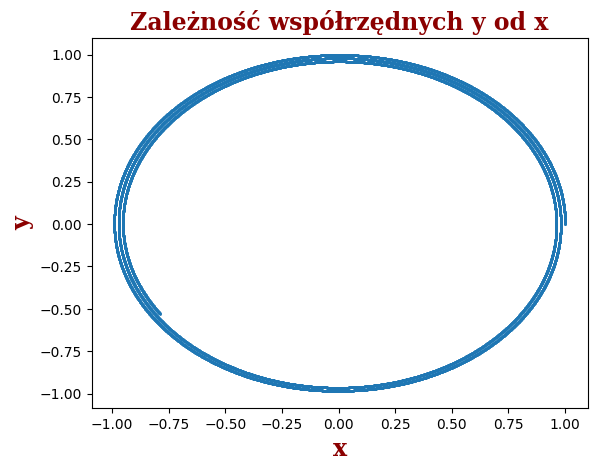

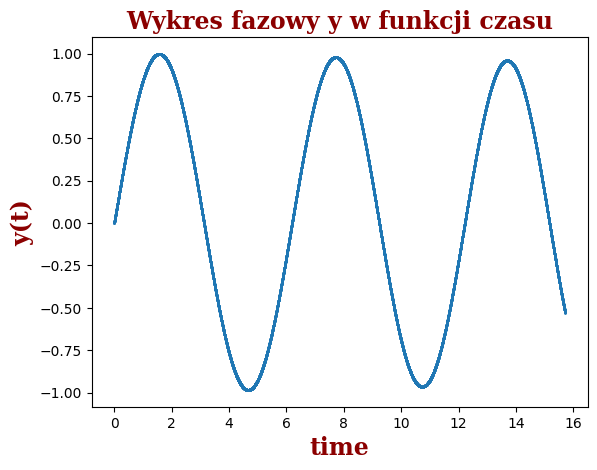

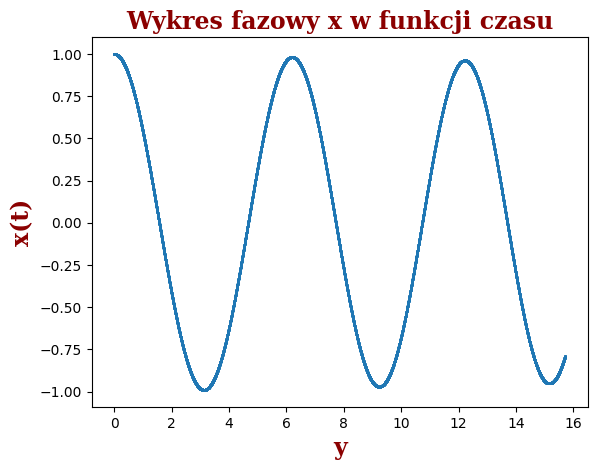

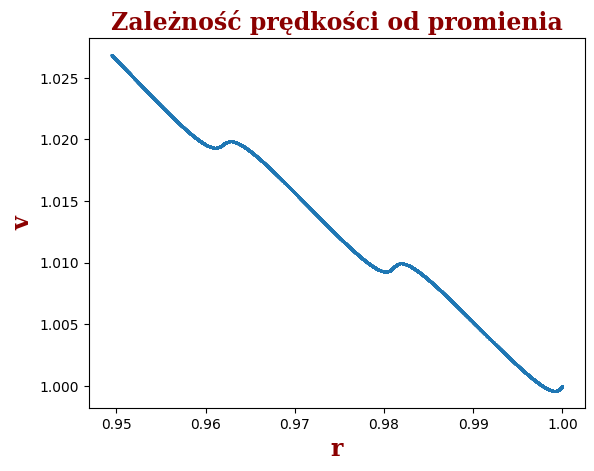

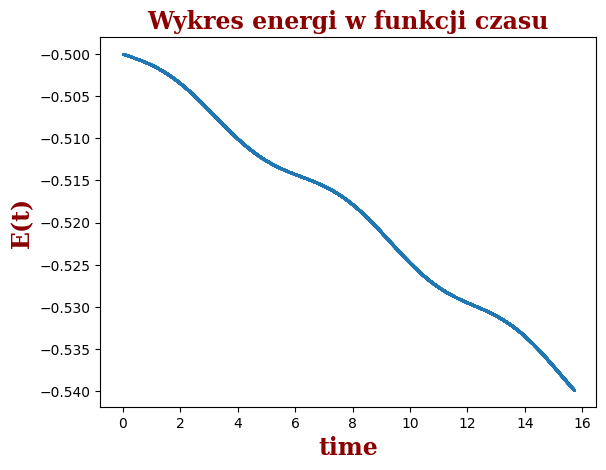

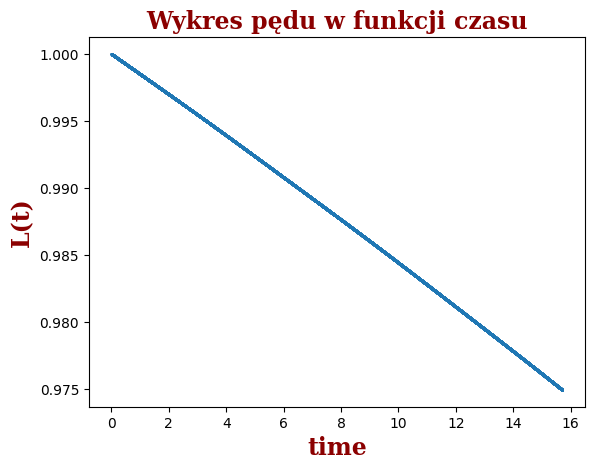

In [39]:
# Backward Euler Method

def euler_implicit(initial_values, dt, steps):

    t0, t1 = steps
    uvals = []
    tvals = []
    u = initial_values
    
    def step_function(values,next_values,dt):
        x,y,x_velocity,y_velocity = values
        x_next, y_next, x_velocity_next, y_velocity_next = next_values

        norm = np.linalg.norm(next_values[0:2])

        return [
            x - x_next - dt * x_velocity,
            y - y_next - dt * y_velocity,
            x_velocity - x_velocity_next + dt * x/(norm**3),
            y_velocity - y_velocity_next + dt * y/(norm**3),
        ]

    while t0 < t1:
        u_tmp = u.copy()
        u = fsolve(step_function, u, args=(u_tmp, dt))
        uvals.append(u.copy())
        t0 += dt
        tvals.append(t0)

    return np.array(uvals), tvals


u, t = euler_implicit(initial_values, dt, simulation_time)
x, y, x_velocity, y_velocity = np.array_split(u, 4, axis=1)

r = np.sqrt(x**2 + y**2) # Radius                       
vel =  np.sqrt(x_velocity**2 + y_velocity**2)  # Velocity
energy = vel/2 - 1/r    # Energy
momentum = x*y_velocity - y*x_velocity  # Momentum   

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 17,
        }

plt.scatter(x,y, s=1)
plt.title("Zależność współrzędnych y od x", fontdict=font)
plt.xlabel("x", fontdict=font)
plt.ylabel("y", fontdict=font)
plt.show()

plt.scatter(t,y, s=1)
plt.title("Wykres fazowy y w funkcji czasu", fontdict=font)
plt.xlabel("time", fontdict=font)
plt.ylabel("y(t)", fontdict=font)
plt.show()

plt.scatter(t,x, s=1)
plt.title("Wykres fazowy x w funkcji czasu", fontdict=font)
plt.xlabel("y", fontdict=font)
plt.ylabel("x(t)", fontdict=font)
plt.show()

plt.scatter(r,vel, s=1)
plt.title("Zależność prędkości od promienia", fontdict=font)
plt.xlabel("r", fontdict=font)
plt.ylabel("v", fontdict=font)
plt.show()

plt.scatter(t,energy, s=1)
plt.title("Wykres energi w funkcji czasu", fontdict=font)
plt.xlabel("time", fontdict=font)
plt.ylabel("E(t)", fontdict=font)
plt.show()

plt.scatter(t,momentum, s=1)
plt.title("Wykres pędu w funkcji czasu", fontdict=font)
plt.xlabel("time", fontdict=font)
plt.ylabel("L(t)", fontdict=font)
plt.show()

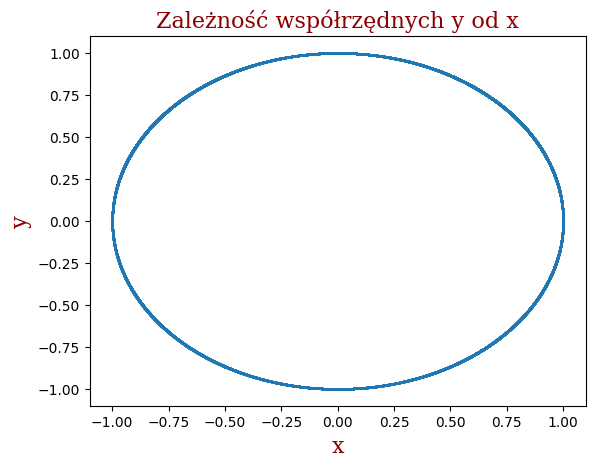

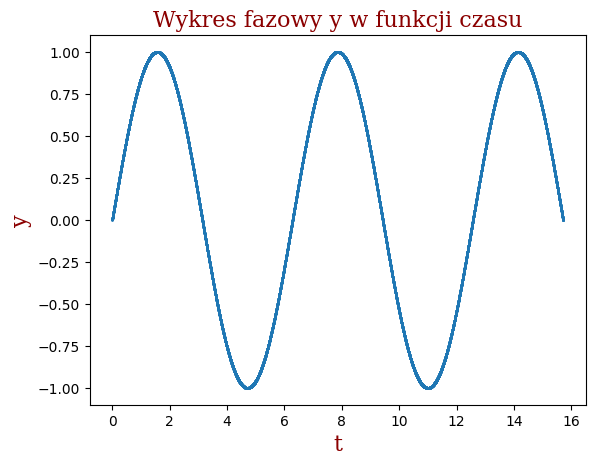

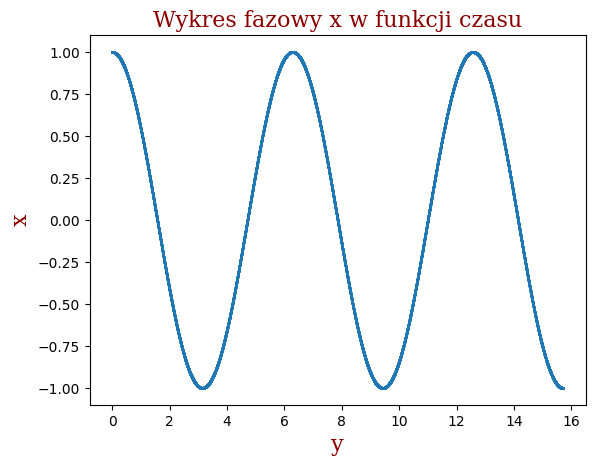

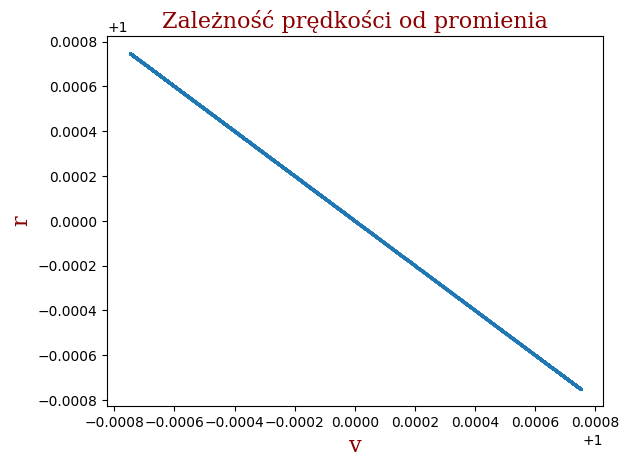

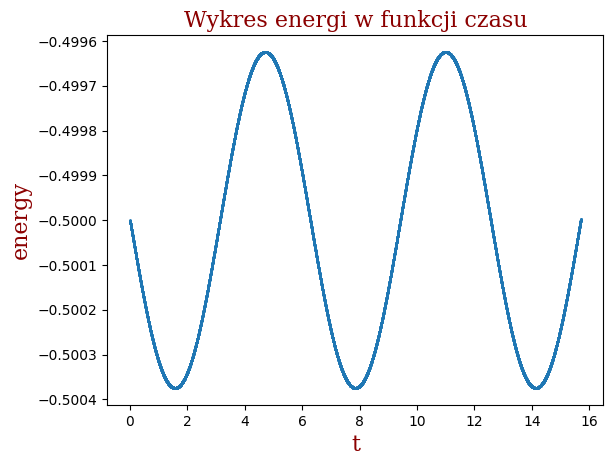

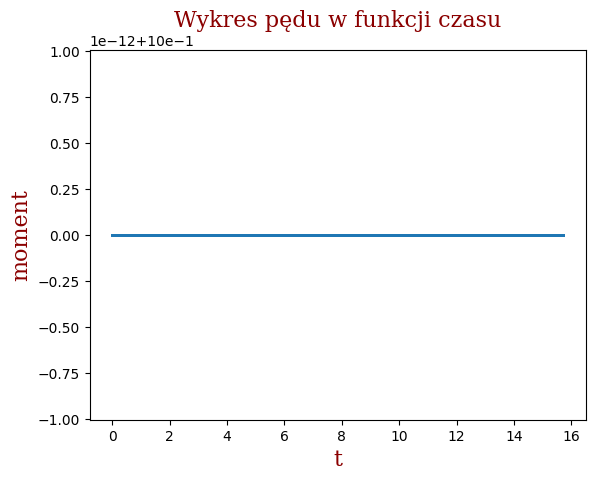

In [40]:
def euler_semi_implicit(initial_values, dt, steps):

    t0, t1 = steps
    uvals = []
    tvals = []
    u = initial_values
    
    while t0 < t1:
        r = np.linalg.norm([u[0:2]])

        u[2] -= dt*u[0]/r**3
        u[3] -= dt*u[1]/r**3
        u[0] += dt*u[2]
        u[1] += dt*u[3]
        
        uvals.append(u.copy())
        t0 += dt
        tvals.append(t0)

    return np.array(uvals), tvals

u, t = euler_semi_implicit(initial_values, dt, simulation_time)
x, y, u, v = np.array_split(u, 4, axis=1)

vel = np.sqrt(u**2 + v**2)
r = np.sqrt(x**2 + y**2)

energy = vel/2 - 1/r
momentum = x*v - y*u


font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.scatter(x,y, s=1)
plt.title("Zależność współrzędnych y od x", fontdict=font)
plt.xlabel("x", fontdict=font)
plt.ylabel("y", fontdict=font)
plt.show()

plt.scatter(t,y, s=1)
plt.title("Wykres fazowy y w funkcji czasu", fontdict=font)
plt.xlabel("t", fontdict=font)
plt.ylabel("y", fontdict=font)
plt.show()

plt.scatter(t,x, s=1)
plt.title("Wykres fazowy x w funkcji czasu", fontdict=font)
plt.xlabel("y", fontdict=font)
plt.ylabel("x", fontdict=font)
plt.show()

plt.scatter(r,vel, s=1)
plt.title("Zależność prędkości od promienia", fontdict=font)
plt.xlabel("v", fontdict=font)
plt.ylabel("r", fontdict=font)
plt.show()

plt.scatter(t,energy, s=1)
plt.title("Wykres energi w funkcji czasu", fontdict=font)
plt.xlabel("t", fontdict=font)
plt.ylabel("energy", fontdict=font)
plt.show()

plt.scatter(t,momentum, s=1)
plt.title("Wykres pędu w funkcji czasu", fontdict=font)
plt.xlabel("t", fontdict=font)
plt.ylabel("moment", fontdict=font)
plt.show()

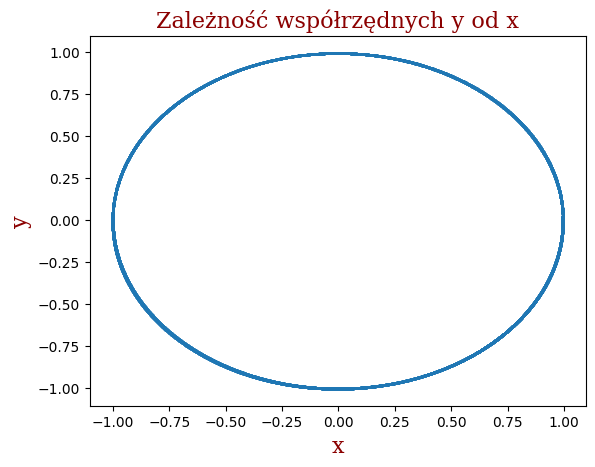

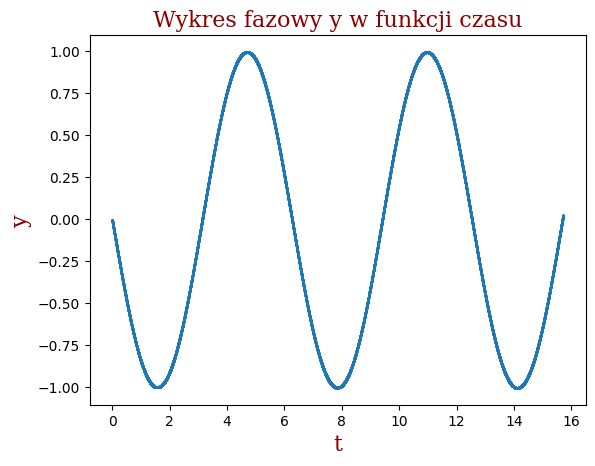

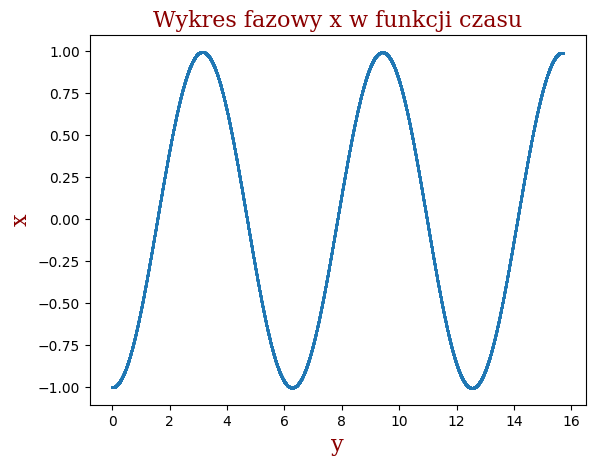

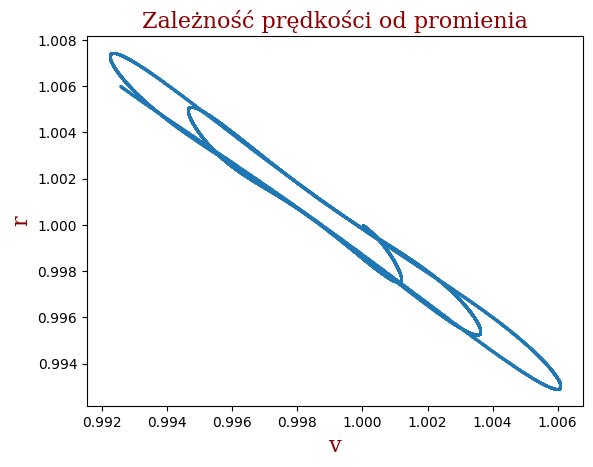

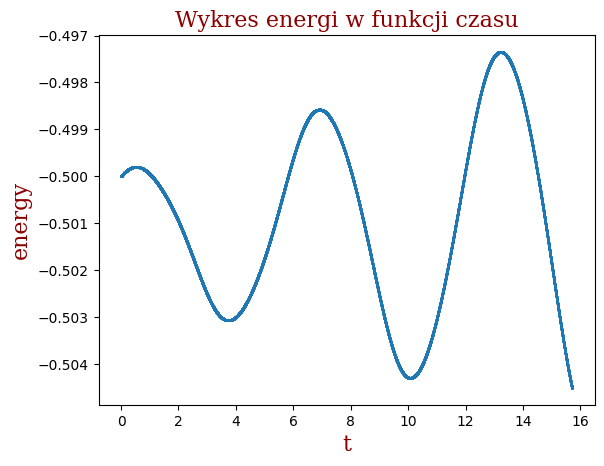

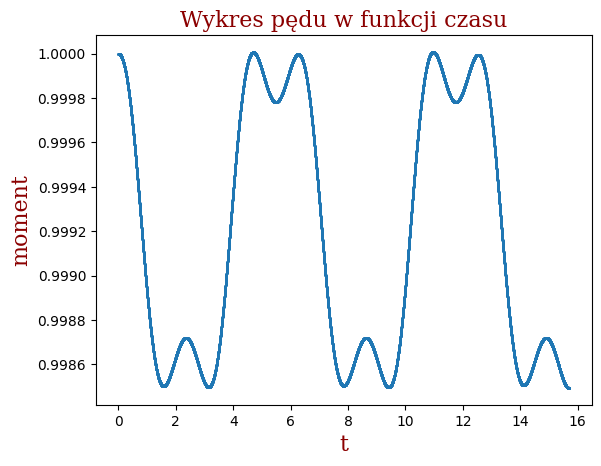

In [41]:
def runge(u_0, dt, steps):
    def helper(u, wsp, k):
        r = np.linalg.norm(u[0:2])

        return np.array([
            u[2] + wsp*k[2], 
            u[3] + wsp*k[3], 
            -(u[0] + wsp*k[0]) / (r + wsp*k[0])**3, 
            -(u[1] + wsp*k[1]) / (r + wsp*k[1])**3, 
        ])

    def calculate_step(u, dt):
        k1 = helper(u, 0, [1,1,1,1])
        k2 = helper(u, dt*0.5, k1)
        k3 = helper(u, dt*0.5, k2)
        k4 = helper(u, dt, k3)

        return np.multiply(dt, np.divide((k1 + 2*k2 + 2*k3 + k4), 6))
    
    
    t0, t1 = steps
    uvals = []
    tvals = []

    u = u_0
    
    while t0 < t1:
        u += calculate_step(u,dt)
        uvals.append(u.copy())
        t0 += dt
        tvals.append(t0)

    return np.array(uvals), tvals

u, t = runge(initial_values, dt, simulation_time)
x, y, u, v = np.array_split(u, 4, axis=1)

vel = np.sqrt(u**2 + v**2)
r = np.sqrt(x**2 + y**2)

energy = vel/2 - 1/r
momentum = x*v - y*u


font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.scatter(x,y, s=1)
plt.title("Zależność współrzędnych y od x", fontdict=font)
plt.xlabel("x", fontdict=font)
plt.ylabel("y", fontdict=font)
plt.show()

plt.scatter(t,y, s=1)
plt.title("Wykres fazowy y w funkcji czasu", fontdict=font)
plt.xlabel("t", fontdict=font)
plt.ylabel("y", fontdict=font)
plt.show()

plt.scatter(t,x, s=1)
plt.title("Wykres fazowy x w funkcji czasu", fontdict=font)
plt.xlabel("y", fontdict=font)
plt.ylabel("x", fontdict=font)
plt.show()
d = {}

for i in zip(r, vel):
    d[i[0][0]] = i[1][0]

od = collections.OrderedDict(sorted(d.items()))

plt.scatter(od.keys(),od.values(), s = 1)
plt.title("Zależność prędkości od promienia", fontdict=font)
plt.xlabel("v", fontdict=font)
plt.ylabel("r", fontdict=font)
plt.show()

plt.scatter(t,energy, s=1)
plt.title("Wykres energi w funkcji czasu", fontdict=font)
plt.xlabel("t", fontdict=font)
plt.ylabel("energy", fontdict=font)
plt.show()

plt.scatter(t,momentum, s=1)
plt.title("Wykres pędu w funkcji czasu", fontdict=font)
plt.xlabel("t", fontdict=font)
plt.ylabel("moment", fontdict=font)
plt.show()

# Bibliografia
* Katarzyna Rycerz: Wykład z przedmiotu Metody Obliczeniowe w Nauce i Technice
* Materiały do zajęć 
* Julian Janus: Stabilność rozwiązań równań różniczkowych zwyczajnych - open.agh.edu.pl